In [1]:
import pandas as pd
df = pd.read_csv('211210-DRM-total.csv')

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
metal_df = df.iloc[:,2:25]#24
support_df = df.iloc[:,25:70] #45
pretreat_df = df.iloc[:,70:76] #6
operate_df = df.iloc[:,76:85] #9
target_df = df.iloc[:,-1] #1

In [4]:
all_df = [metal_df,support_df,pretreat_df,operate_df]

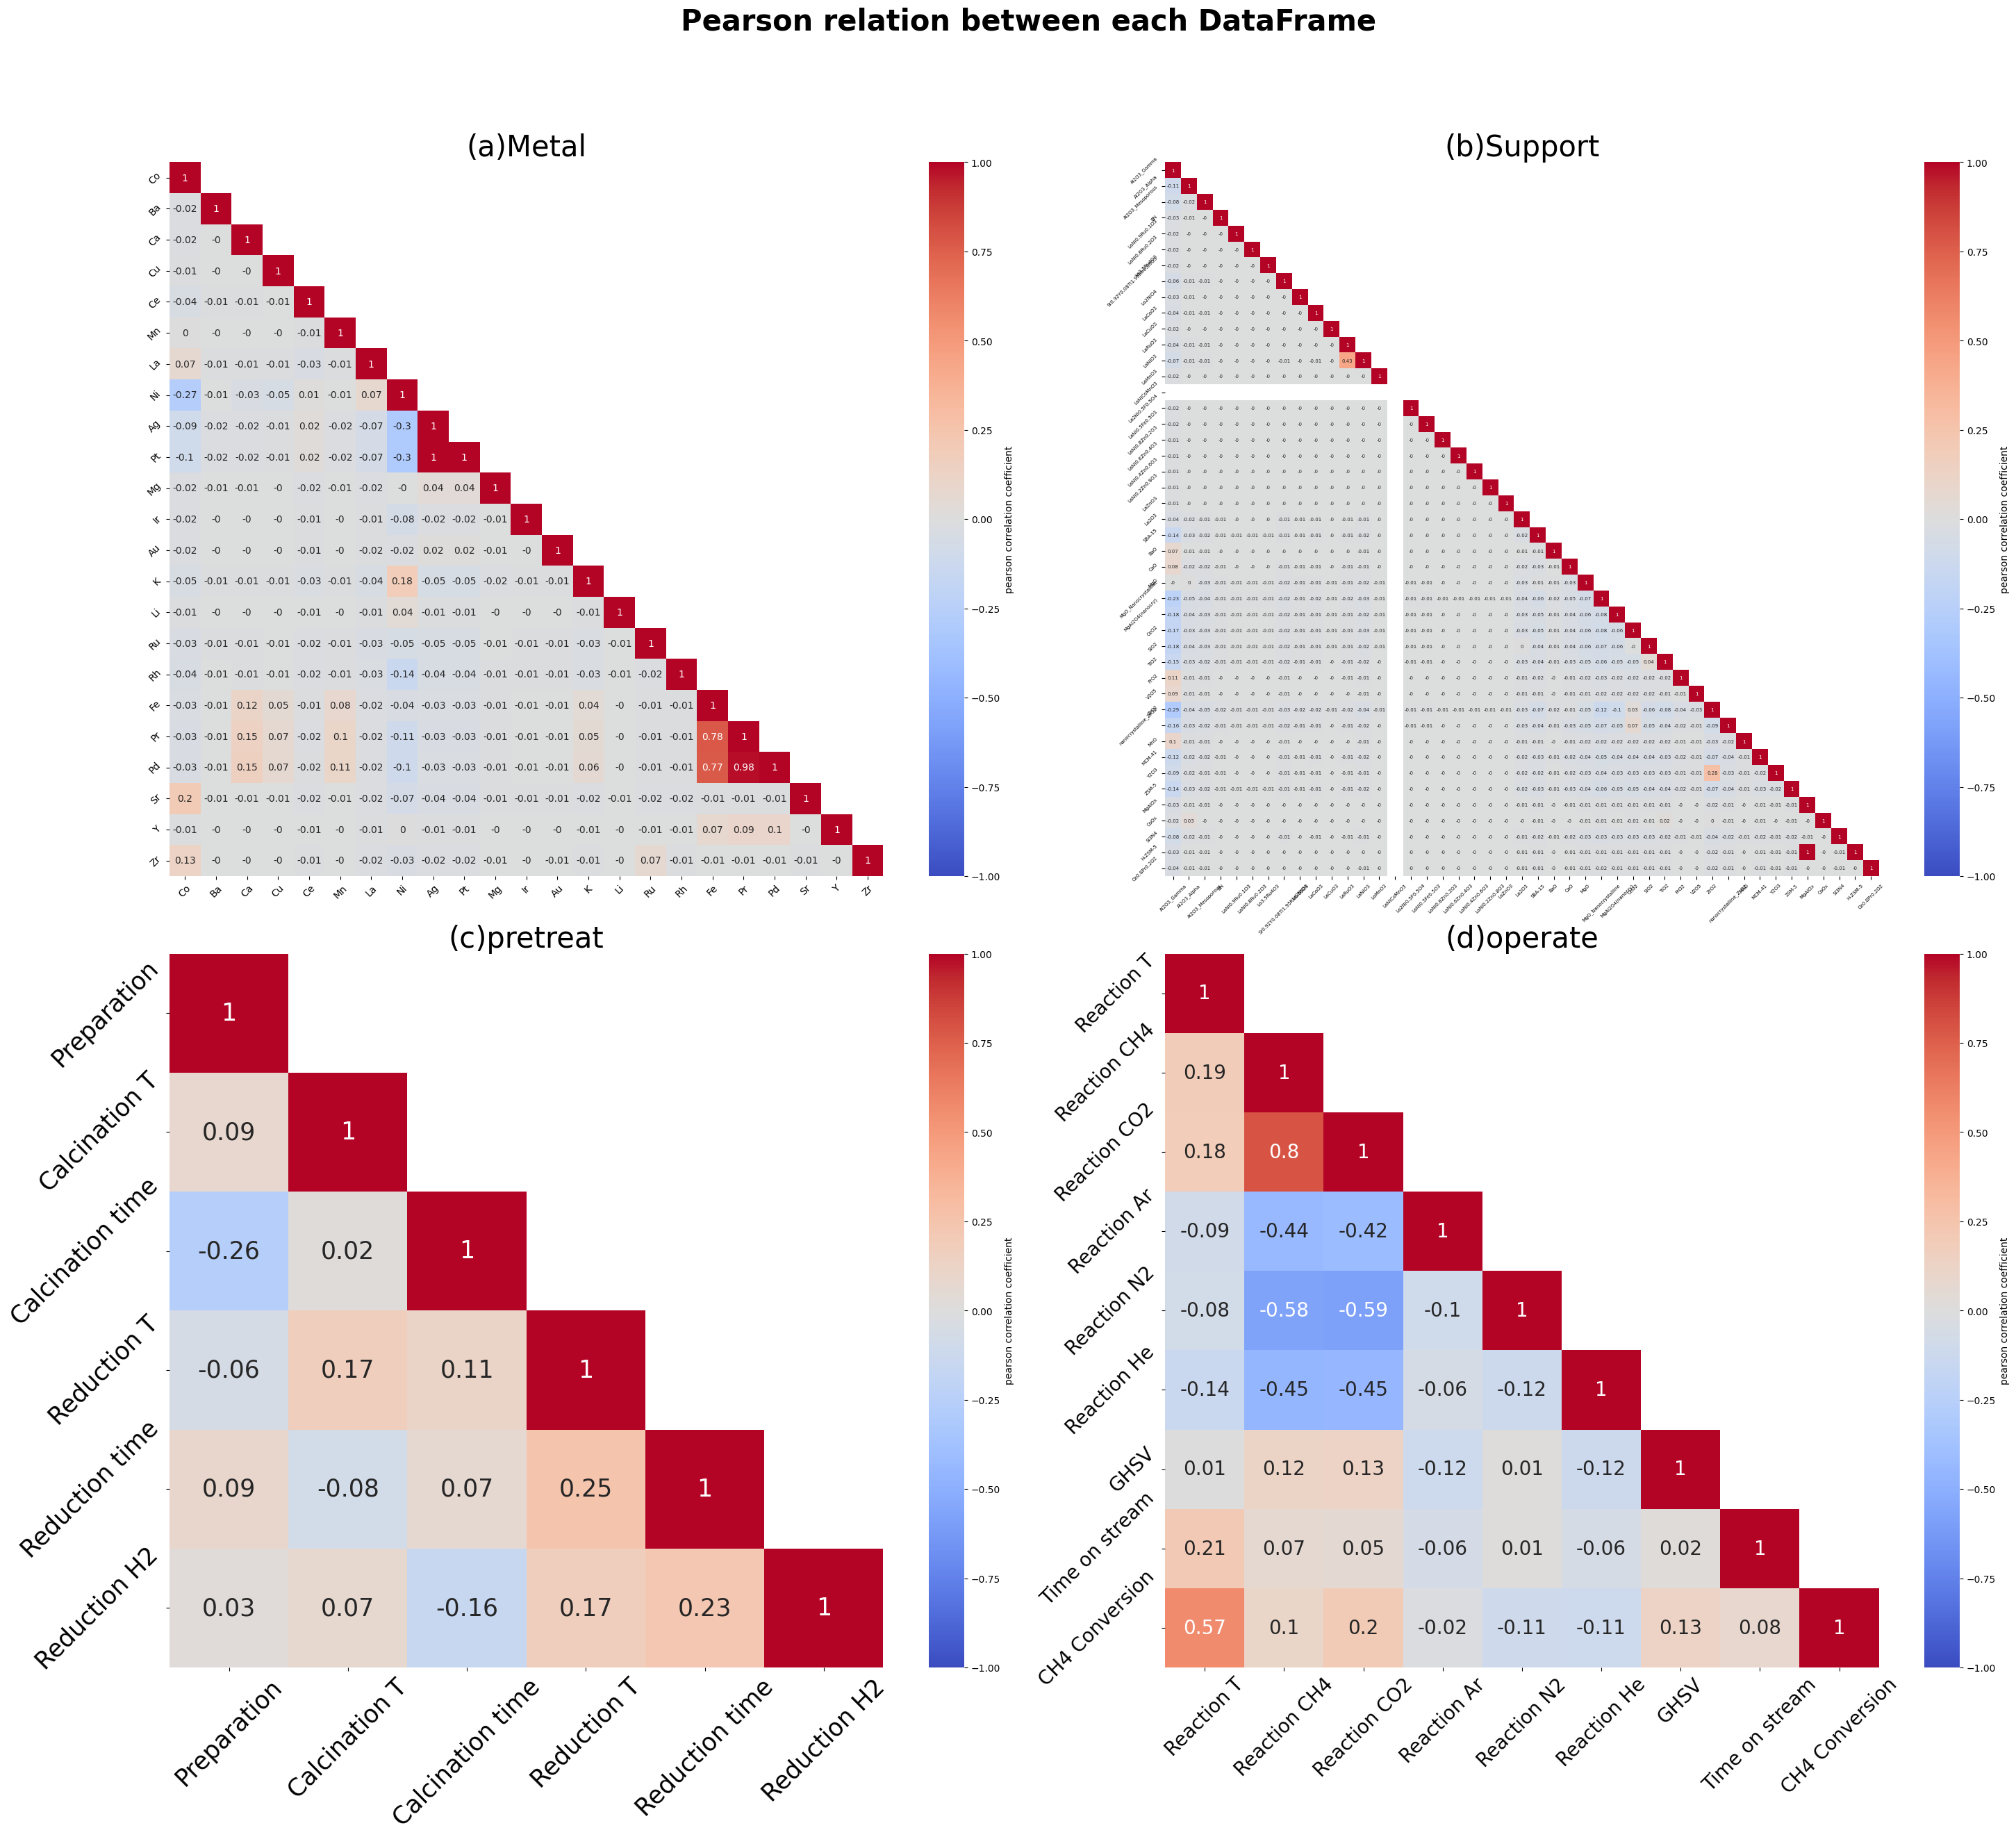

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
fig,axes = plt.subplots(2,2,figsize = (30,25))
axes = axes.flatten()
titles = ['(a)Metal','(b)Support','(c)pretreat','(d)operate']
font_size = [10,5,25,20]
for idx,comp in enumerate(all_df):
    ax = axes[idx]
    corr = all_df[idx].corr(method = 'pearson')
    mask = np.triu(np.ones_like(corr,dtype = bool),k = 1)
    sns.heatmap(
        corr,
        mask = mask,
        annot = corr.round(2),
        cmap = 'coolwarm',
        ax = ax,
        annot_kws={'size':font_size[idx]},
        center = 0,
        vmax = 1,
        vmin = -1,
        square = True,
       cbar_kws = {'label':'pearson correlation coefficient'}
    )
    ax.set_title(titles[idx],fontsize = 30)
    ax.tick_params(axis = 'x',rotation= 45,labelsize= font_size[idx])
    ax.tick_params(axis = 'y',rotation=45, labelsize = font_size[idx])
plt.suptitle('Pearson relation between each DataFrame',fontsize = 30,fontweight = 'bold',y=1.05)
plt.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.show()


In [ ]:
arr = np.ones((4,4))
np.triu(np.ones_like(arr,dtype = bool),k =1)

## 금속 양에 대한 정보

In [ ]:
metal_amount = dict()
for i in metal_df.columns:
    metal_amount[i] = float(f'{df.loc[:,i].sum():.2f}')

In [ ]:
metal_amount = dict(
    sorted(
        metal_amount.items(),
        key = lambda x:x[1],
        reverse = True
    )
)


In [ ]:
metal_amount

## 지지체 양

In [ ]:
support_amount = dict()
for i in support_df.columns:
    support_amount[i] = float(f'{df.loc[:,i].sum():.2f}')
    

In [ ]:
support_sorted_amount = dict(
    sorted(
        support_amount.items(),
        key = lambda x: x[1],
        reverse = True
    )
)
support_sorted_amount

## 어떻게 x,c를 합쳐서 진행할지에 대해 생각

In [ ]:
metal_tensor = torch.tensor(metal_df.values, dtype=torch.float32) #24
cond_tensor = torch.tensor(cond_df.values,dtype = torch.float32) # 6

In [ ]:
xdim = metal_tensor.shape[1]

In [ ]:
encoder_tensor = torch.cat([metal_tensor,cond_tensor],dim = 1)
encoder_tensor.shape[1]

## vae 연습

In [ ]:
import torch.nn as nn
# 연습중
xdim = metal_tensor.shape[1]
cdim = encoder_tensor.shape[1]
class Encoder(nn.Module):
    def __init__(self,xdim,cdim,zdim=16,hdim=128):
        super(Encoder,self).__init__()
        self.h1 = nn.Linear()
        self.h2 = nn.Linear()
        self.mu = nn.Linear()
        self.logvar = nn.Linear()
    def get(self,x,c):
        h = torch.cat([x,c],dim = 1)
        h = self.h1(h)
        h = self.h2(h)


In [ ]:
class Decoder(nn.Module):
    def __init__(self,xdim,cdim,zdim = 16,hdim = 128):
        super(Decoder,self).__init__()
        self.h1 = nn.Linear()
        self.h2 = nn.Linear()
    def get(self,z,c):
        h = torch.cat([z,c],dim = 1)
        h = self.h1(h)
        h = self.h2(h)

In [ ]:
import torch.nn as nn
import torch.nn.function as F
class CVAERegressor(nn.Module):
    def __init__(self,xdim,cdim,zdim,h1=128,h2 =64):
        super(CVAERegressor,self).__init__()
        self.xdim =xdim
        self.cdim = cdim
        self.zdim = zdim
        #encoder
        self.enc_fc1 = nn.Linear(xdim+cdim,h1)
        self.enc_fc2 = nn.Linear(h1,h2)
        self.enc_mu = nn.Linear(h2,zdim)
        self.enc_logvar = nn.Linear(h2,zdim)
        #decoder
        self.dec_fc1 = nn.Linear(zdim,h1)
        self.dec_fc2 = nn.Linear(h1,h2)
        self.dec_out = nn.Linear(xdim)
    def encode(self,x,c):
        h = torch.cat([x,c],dim = 1)
        h = F.relu(self.enc_fc1(h))
        h = F.relu(self.enc_fc2(h))
        mu = self.enc_mu(h)
        logvar = self.enc_logvar(h)
        return mu,logvar
    def reparameterize(self,mu,logvar):
        #z = mu+std*eps
        std= torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu+std*eps
    def decode(self,z,c):
        h = torch.cat([z,c],dim = 1)
        h = F.relu(self.dec_fc1(h))
        h = F.relu(self.dec_fc2(h))
        x_hat = F.relu(self.dec_out(h))
        return x_hat
    def forward(self,x,c):
        mu,logvar = self.encode(x,c)
        z = self.reparmeterize(mu,logvar)
        x_hat = decode(z,c)
        return x_hat, mu, logvar
    @staticmethod
    def loss_fn(x_hat)
    @staticmethod
    def rmse(x_hat,x_pred,eps = 1e-12):
        mse = torch.mean((x_hat-x_pred)**2)
        return torch.sqrt(mse+eps)
    @staticmehtod
    def r2_score(x_pred,x_hat,eps=1e-12):
        y_mean= torch.mean(y_true,dim = 0, keepdim = True)
        sse = 

    

In [192]:
import torch.nn as nn
import torch.functional as F
class CVAE(nn.Module):
    def __init__(self,x_dim,c_dim,z_dim,h1=256,h2=128):
        super().__init__()
        self.x_dim = x_dim
        self.c_dim = c_dim
        self.z_dim = z_dim
        #encoder
        self.enc_1 = nn.Linear(x_dim+c_dim,h1)
        self.enc_2 = nn.Linear(h1,h2)
        self.mu = nn.Linear(h2,z_dim)
        self.logvar = nn.Linear(h2,z_dim)
        #decoder
        self.dec_1 = nn.Linear(z_dim+x_dim,h1)
        self.dec_2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,x_dim)
    def encoder(self,x,c):
        h = torch.cat([x,c],dim = 1)
        h = F.relu(self.enc_1(h))
        h = F.relu(self.enc_2(h))
        mu = self.mu(h)
        logvar = self.logvar(h)
        return mu,logvar
    def reparmeterize(self,mu,logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + std*eps
    def decoder(self,z,x):
        h = torch.cat([z,x],dim = 1)
        h = F.relu(self.dec_1(h))
        h = F.relu(self.dec_2(h))
        x_hat = F.relu(self.out(h))
        return x_hat
    def forward(self,x,c):
        mu,logvar = self.encoder(x,c)
        z = self.reparmeterize(mu,logvar)
        x_hat = decode(z,x)
        return x_hat, mu,logvar
        
    
    

In [ ]:
model = CVAE(x_dim = X_train.shape[1],c_dim = C_train.shape[1],z_dim =16)
history = fit(model,X_train.C_train)